# load module

In [6]:
import subprocess
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

# ZGA genes

In [7]:
import os
danRer11_2_transcript_to_gene = {}
danRer11_2_transcript_to_gene_clean = {}

with open(os.path.expanduser('~wangwen/source/bySpecies/danRer11_2/danRer11_2.ensGene.genePredExt')) as fhd:
    for line in fhd:
        line = line.strip().split()
        danRer11_2_transcript_to_gene_clean[line[0].split('.')[0]]= line[11].split('.')[0]
        danRer11_2_transcript_to_gene[line[0]]= line[11]

list(danRer11_2_transcript_to_gene.items())[:5]

[('ENSDART00000164359.1', 'ENSDARG00000099104.1'),
 ('ENSDART00000158290.1', 'ENSDARG00000099104.1'),
 ('ENSDART00000157701.1', 'ENSDARG00000099104.1'),
 ('ENSDART00000167898.1', 'ENSDARG00000099104.1'),
 ('ENSDART00000166393.1', 'ENSDARG00000102407.2')]

#### nature 2013

In [8]:
nature_2013_genes = pd.read_csv(
    '/mnt/Storage/home/wangwen/project/fitCR/source/nature_2013_nature12632/41586_2013_BFnature12632_MOESM30_ESM.txt',
    skiprows=23,sep='\t')
nature_2013_genes.head()

,Gene_id,Symbol,Description,Adult_tissue_count,Meta_gene,Maternal_contr,Exon_length,Masked_intron_length,WT4_exon_rpkm,WT4_intron_rpkm,...,NS4_down,P4_down,PN4_down,PS4_down,PNS4_down,N6_down,NS6_down,P6_down,PS6_down,PNS6_down
0,ENSDARG00000000001,slc35a5,"solute carrier family 35, member A5",NaN,.,M,2478,4255,8.914,1.404,...,.,.,.,.,.,.,.,.,.,.
1,ENSDARG00000000002,ccdc80,coiled-coil domain containing 80,NaN,.,Z,3175,12250,0.232,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ENSDARG00000000018,nrf1,nuclear respiratory factor 1,8.0,.,M,3074,13354,77.050,0.196,...,.,.,.,.,.,X,X,.,.,X
3,ENSDARG00000000019,ube2h,ubiquitin-conjugating enzyme E2H (UBC8 homolog...,8.0,.,M,3659,27485,37.676,0.217,...,.,.,.,.,.,X,X,.,.,X
4,ENSDARG00000000068,slc9a3r1,solute carrier family 9 (sodium/hydrogen excha...,8.0,.,M,2458,25261,31.587,0.003,...,.,.,.,.,.,.,.,.,.,.


In [9]:
first_wave_genes = set()
for index, row in nature_2013_genes.iterrows():
    if row['First_wave_5rpkm'] == 'X':
        first_wave_genes.add(row['Gene_id'])
print(len(first_wave_genes))


269


In [10]:
first_wave_genes_danRer11_2 = first_wave_genes & set(
    [x.split('.')[0] for x in danRer11_2_transcript_to_gene.values()])
print(len(first_wave_genes_danRer11_2))


196


#### earlyZGA genes (cell rep 2014)

In [11]:
import os
earlyGA_genes = set(pd.read_csv(os.path.expanduser('/mnt/Storage/home/wangwen/project/fitCR/source/cellrep2014_4sUTP/genelist.txt'),header=None)[0])
earlyGA_genes_danRer11_2 =  earlyGA_genes & set(
    [x.split('.')[0] for x in danRer11_2_transcript_to_gene.values()])
print(len(earlyGA_genes_danRer11_2))


342


#### zygotic specific

In [12]:
zygotic_specific=set()
with open(os.path.expanduser('/mnt/Storage/home/wangwen/project/zebrafish_allelic/source/dev_095091_zygote_specific_gene.txt')) as fhd:
    for line in fhd:
        zygotic_specific.add(line.strip())
zygotic_specific_danRer11_2 = zygotic_specific & set(	
    [x.split('.')[0] for x in danRer11_2_transcript_to_gene.values()])

In [13]:
gene_ZGA = first_wave_genes_danRer11_2 | earlyGA_genes_danRer11_2 | zygotic_specific_danRer11_2
print(len(gene_ZGA))

603


In [14]:
list(gene_ZGA)[:5]

['ENSDARG00000045219',
 'ENSDARG00000004328',
 'ENSDARG00000031907',
 'ENSDARG00000077456',
 'ENSDARG00000088686']

# ZGA gene expression level

In [21]:
import glob
# os.chdir('/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/genes4_ko_analysis/RNAseq/diff_byTrans')
os.chdir('/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/genes4_ko_analysis/RNAseq/diff')
diffFiles = glob.glob('*.diff')
rpkm_df_dict = {}
for file in diffFiles :
    gene = file.split('_')[2]
    stage = file.split('_')[3]
    rpkm_df_dict[f'{gene}_{stage}'] = pd.read_csv(file, usecols = [0,1,6], comment = '#', names = ['transcript_id', 'gene_id', 'RPKM'], sep = "\t")
    rpkm_df_dict[f'{gene}_{stage}']['RPKM_log10'] = np.log10(rpkm_df_dict[f'{gene}_{stage}']['RPKM']+1)
    
rpkm_df_dict[f'{gene}_{stage}']

,transcript_id,gene_id,RPKM,RPKM_log10
0,ENSDARG00000000001.6,ENSDARG00000000001.6,3.327610,0.636248
1,ENSDARG00000000002.8,ENSDARG00000000002.8,0.668009,0.222198
2,ENSDARG00000000018.9,ENSDARG00000000018.9,7.399570,0.924257
3,ENSDARG00000000019.9,ENSDARG00000000019.9,59.403300,1.781061
4,ENSDARG00000000068.9,ENSDARG00000000068.9,15.265700,1.211273
...,...,...,...,...
32031,ENSDARG00000117823.1,ENSDARG00000117823.1,0.000000,0.000000
32032,ENSDARG00000117824.1,ENSDARG00000117824.1,2.227260,0.508834
32033,ENSDARG00000117825.1,ENSDARG00000117825.1,0.000000,0.000000
32034,ENSDARG00000117826.1,ENSDARG00000117826.1,0.120044,0.049235


In [23]:
import glob
# os.chdir('/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/genes4_ko_analysis/RNAseq/diff_byTrans')
os.chdir('/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/genes4_ko_analysis/RNAseq/diff')
diffFiles = glob.glob('WT_VS_mcm6l_*_ensGene.diff')
for file in diffFiles :
    gene = 'wt'
    stage = file.split('_')[3]
    rpkm_df_dict[f'{gene}_{stage}'] = pd.read_csv(file, usecols = [0,1,5], comment = '#', names = ['transcript_id', 'gene_id', 'RPKM'], sep = "\t")
    rpkm_df_dict[f'{gene}_{stage}']['RPKM_log10'] = np.log10(rpkm_df_dict[f'{gene}_{stage}']['RPKM']+1)
    
rpkm_df_dict[f'{gene}_{stage}']

,transcript_id,gene_id,RPKM,RPKM_log10
0,ENSDARG00000000001.6,ENSDARG00000000001.6,3.405760,0.644021
1,ENSDARG00000000002.8,ENSDARG00000000002.8,1.186120,0.339674
2,ENSDARG00000000018.9,ENSDARG00000000018.9,5.877990,0.837462
3,ENSDARG00000000019.9,ENSDARG00000000019.9,57.132600,1.764420
4,ENSDARG00000000068.9,ENSDARG00000000068.9,12.732500,1.137750
...,...,...,...,...
32031,ENSDARG00000117823.1,ENSDARG00000117823.1,0.000000,0.000000
32032,ENSDARG00000117824.1,ENSDARG00000117824.1,2.162090,0.499974
32033,ENSDARG00000117825.1,ENSDARG00000117825.1,0.000000,0.000000
32034,ENSDARG00000117826.1,ENSDARG00000117826.1,0.059097,0.024936


In [24]:
sorted(rpkm_df_dict.keys())

['mcm3l_1k',
 'mcm6l_1k',
 'mcm6l_256',
 'mcm6l_64',
 'mcm6l_oblong',
 'mcm6l_oocyte',
 'npm2a_1k',
 'npm2a_256',
 'npm2a_64',
 'npm2a_oblong',
 'npm2a_oocyte',
 'orc1_1k',
 'orc1_oocyte',
 'wt_1k',
 'wt_256',
 'wt_64',
 'wt_oblong',
 'wt_oocyte']

## ZGA gene expr

In [27]:
ZGA_expr_df.empty

True

In [36]:
ZGA_expr_df = pd.DataFrame()
for gene in ['npm2a', 'wt'] :
    for stage in ['oocyte', '64', '256', '1k', 'oblong'] :
        k = f'{gene}_{stage}'
        df = rpkm_df_dict[k].copy()
        df['gene_id_clean'] = df['gene_id'].str.split('.', expand = True)[0]
        df = df.loc[df['gene_id_clean'].isin(gene_ZGA)][['gene_id', 'RPKM']]
        df.columns = ['gene_id', f'{k}']
        if ZGA_expr_df.empty :
            ZGA_expr_df = df
        else :
            ZGA_expr_df = pd.merge(ZGA_expr_df, df, on = 'gene_id')
            
ZGA_expr_df

,gene_id,npm2a_oocyte,npm2a_64,npm2a_256,npm2a_1k,npm2a_oblong,wt_oocyte,wt_64,wt_256,wt_1k,wt_oblong
0,ENSDARG00000001169.12,7.769700,5.536200,6.064580,6.936950,4.362450,3.795780,3.698940,4.873450,5.418900,5.582610
1,ENSDARG00000001303.12,0.286127,0.000000,0.011985,0.030547,0.000000,0.068582,0.009940,0.015991,0.068365,0.256631
2,ENSDARG00000002353.10,0.053074,0.026360,0.320390,1.004430,0.000000,0.099002,0.058461,0.076945,2.380150,9.683490
3,ENSDARG00000002445.7,0.000000,0.081080,0.102492,0.203181,0.000000,0.060153,0.043594,0.352973,0.245142,0.250413
4,ENSDARG00000002601.8,0.103603,0.344846,7.516000,22.985400,0.146498,0.084239,0.094966,0.276436,30.389500,52.852100
...,...,...,...,...,...,...,...,...,...,...,...
598,ENSDARG00000095734.2,0.000000,0.000000,0.023317,0.105656,0.000000,0.000000,0.000000,0.000000,0.130400,0.366146
599,ENSDARG00000095745.3,0.410867,3.438030,3.714470,3.394650,1.798270,0.528512,1.182360,3.134310,3.718880,5.685810
600,ENSDARG00000095951.2,2.411090,2.934360,3.120770,3.390020,2.695240,0.229603,2.754780,3.678040,3.694950,3.448600
601,ENSDARG00000096210.4,0.000000,0.059741,0.242610,0.406438,0.015302,0.011732,0.005668,0.155010,3.123240,11.783700


## boxplot

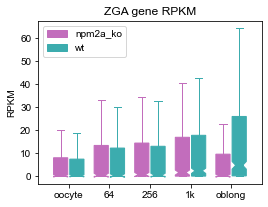

In [79]:
fig, ax = plt.subplots(figsize=(4,3))
# '#3CACAE', '#C26DBC'
c = "#C26DBC"
box0 = ax.boxplot(ZGA_expr_df.iloc[:,1:6], positions=[1.05,2.05,3.05,4.05,5.05], notch=True, patch_artist=True,
                  widths = 0.35,
           showfliers = False,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),
          )
c2 = "#3CACAE"
box1 = ax.boxplot(ZGA_expr_df.iloc[:,6:11], positions=[1.45,2.45,3.45,4.45,5.45], notch=True, patch_artist=True,
                  widths = 0.35,
           showfliers = False,
            boxprops=dict(facecolor=c2, color=c2),
            capprops=dict(color=c2),
            whiskerprops=dict(color=c2),
            flierprops=dict(color=c2, markeredgecolor=c2),
            medianprops=dict(color=c2),
            )      
ax.set_xlim(0.5,6)
ax.set_xticks([1.25,2.25,3.25,4.25,5.25])
ax.set_xticklabels(['oocyte', '64', '256', '1k', 'oblong'])
ax.legend([box0["boxes"][0], box1["boxes"][0]], ['npm2a_ko', 'wt'])
ax.set_title('ZGA gene RPKM')
ax.set_ylabel('RPKM')
fig.savefig('/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/genes4_ko_analysis/RNAseq/figures/make2_box_ZGAgeneExpr_npm_byGene.pdf',
            transparent = True)